In [98]:
from packaging import version
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import tensorboard as tb

In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [68]:
q1_sb_no_rtg_dsa = EventAccumulator("data/q1_sb_no_rtg_dsa_CartPole-v0_02-01-2021_17-32-55")
q1_sb_rtg_dsa = EventAccumulator("data/q1_sb_rtg_dsa_CartPole-v0_03-01-2021_11-11-29")
q1_sb_rtg_na = EventAccumulator("data/q1_sb_rtg_na_CartPole-v0_03-01-2021_11-39-10")


In [73]:
def convert_events_to_df(events):
    events.Reload()
    return pd.concat([pd.DataFrame(events.Scalars(tag), \
                        columns=['wall_time', 'step', tag]).drop(columns=['wall_time']).set_index('step') \
                                 for tag in events.Tags()['scalars']], axis=1)

In [75]:
q1_sb_no_rtg_dsa_df = convert_events_to_df(q1_sb_no_rtg_dsa)
q1_sb_rtg_dsa_df = convert_events_to_df(q1_sb_rtg_dsa)
q1_sb_rtg_na_df = convert_events_to_df(q1_sb_rtg_na)

Text(0.5, 1.0, 'Small Batch')

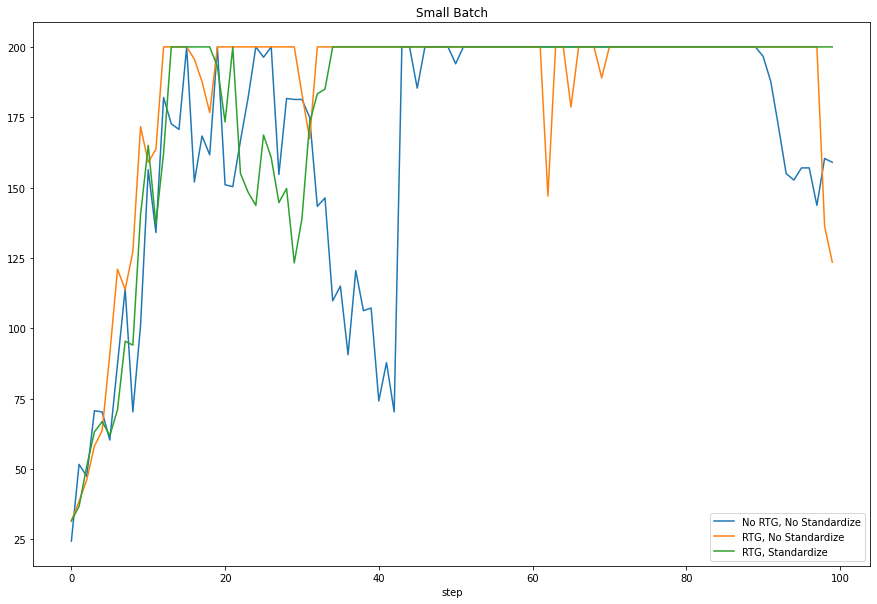

In [90]:
fig, ax = plt.subplots(figsize=(15,10))
q1_sb_no_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='No RTG, No Standardize')
q1_sb_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, No Standardize')
q1_sb_rtg_na_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, Standardize')
ax.set_title('Small Batch')

##### FIll between data values

In [128]:
steps = q1_sb_no_rtg_dsa_df.index
mean_average_return_all_seeds = list(map(lambda z : np.mean(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))
min_average_return_all_seeds = list(map(lambda z : np.min(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))
max_average_return_all_seeds = list(map(lambda z : np.max(z), zip(*[q1_sb_no_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_dsa_df['Eval_AverageReturn'],
                                     q1_sb_rtg_na_df['Eval_AverageReturn']])))

In [124]:
list(xxx)

[]

Text(0.5, 1.0, 'Small Batch with variance')

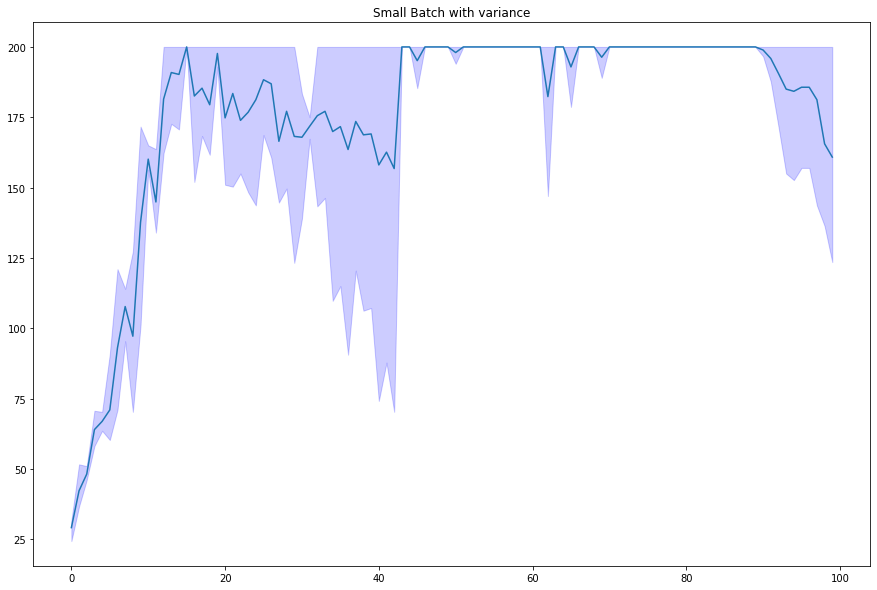

In [134]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(q1_sb_no_rtg_dsa_df.index, np.array(mean_average_return_all_seeds))
ax.fill_between(q1_sb_no_rtg_dsa_df.index, min_average_return_all_seeds, max_average_return_all_seeds,
               color = 'blue', alpha=0.2)
ax.set_title('Small Batch with variance')

In [135]:
q1_lb_no_rtg_dsa = EventAccumulator("data/q1_lb_no_rtg_dsa_CartPole-v0_03-01-2021_12-02-10")
q1_lb_rtg_dsa = EventAccumulator("data/q1_lb_rtg_dsa_CartPole-v0_03-01-2021_12-22-05")
q1_lb_rtg_na = EventAccumulator("data/q1_lb_rtg_na_CartPole-v0_03-01-2021_12-21-25")

In [137]:
q1_lb_no_rtg_dsa_df = convert_events_to_df(q1_lb_no_rtg_dsa)
q1_lb_rtg_dsa_df = convert_events_to_df(q1_lb_rtg_dsa)
q1_lb_rtg_na_df = convert_events_to_df(q1_lb_rtg_na)

Text(0.5, 1.0, 'Large Batch')

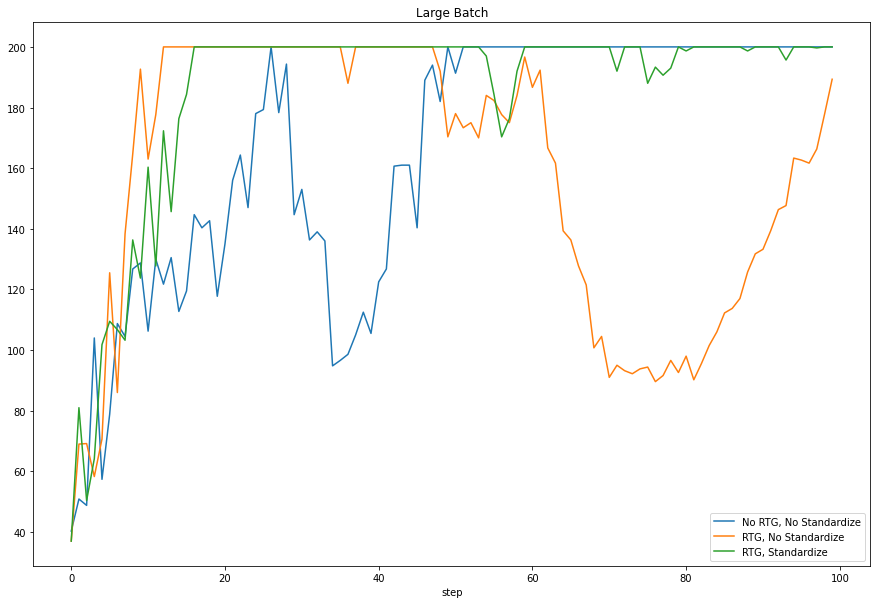

In [138]:
fig, ax = plt.subplots(figsize=(15,10))
q1_lb_no_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='No RTG, No Standardize')
q1_lb_rtg_dsa_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, No Standardize')
q1_lb_rtg_na_df.plot(y='Eval_AverageReturn', ax=ax, label='RTG, Standardize')
ax.set_title('Large Batch')